# Machine Learning Workflow
Complete the steps below to complete the machine learning workflow for this classifier.

In [1]:
import nltk
nltk.download(['punkt', 'wordnet'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ch0125\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ch0125\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import re
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [3]:
url_regex = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

def load_data():
    df = pd.read_csv('corporate_messaging.csv', encoding='latin-1')
    df = df[(df["category:confidence"] == 1) & (df['category'] != 'Exclude')]
    X = df.text.values
    y = df.category.values
    return X, y

def tokenize(text):
    detected_urls = re.findall(url_regex, text)
    for url in detected_urls:
        text = text.replace(url, "urlplaceholder")

    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()

    clean_tokens = []
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)

    return clean_tokens

### Step 1: Load data and perform a train test split

In [4]:
# load data
X, y = load_data()

# perform train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

### Step 2: Train classifier
* Fit and transform the training data with `CountVectorizer`. Hint: You can include your tokenize function in the `tokenizer` keyword argument!
* Fit and transform these word counts with `TfidfTransformer`.
* Fit a classifier to these tfidf values.

In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

# Instantiate transformers and classifier
vect = CountVectorizer(tokenizer=tokenize, stop_words='english')
tfidf = TfidfTransformer()
tfidf_combined = TfidfVectorizer(tokenizer=tokenize, stop_words='english')

# Fit and/or transform each to the data
train_counts = vect.fit_transform(X_train)
train_tfidf = tfidf.fit_transform(train_counts)

# Or combined with TfidfVecotorizer
train_combined = tfidf_combined.fit_transform(X_train)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()
clf_combined = RandomForestClassifier()

# Train the classifier
clf.fit(train_tfidf, y_train)
clf_combined.fit(train_combined, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Step 3: Predict on test data
* Transform (no fitting) the test data with the same CountVectorizer and TfidfTransformer
* Predict labels on these tfidf values.

In [21]:
# Transform test data
test_count = vect.transform(X_test)
test_tfidf = tfidf.transform(test_count)

# Predict test labels
y_pred = clf.predict(test_tfidf)
y_pred[:5]

array(['Information', 'Information', 'Information', 'Information',
       'Action'], dtype=object)

In [22]:
# We are doing the same with the combined Vectorizer
test_tfidf = tfidf_combined.transform(X_test)
y_pred_combined = clf_combined.predict(test_tfidf)
y_pred_combined[:5]

array(['Information', 'Information', 'Information', 'Information',
       'Action'], dtype=object)

### Step 4: Display results
Display a confusion matrix and accuracy score based on the model's predictions.

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np

def print_summary(y_predicted, y_true):
    ''' Function for printing the confusion matrix '''
    labels = np.unique(y_predicted)
    confusion_mat = confusion_matrix(y_true, y_predicted)
    accuracy = accuracy_score(y_true, y_predicted)

    print("Labels:", labels)
    print("Confusion Matrix:\n", confusion_mat)
    print("Accuracy:", accuracy)
    
    return confusion_mat

In [30]:
# CountVectorizer and TfidfTransformer
cm = print_summary(y_pred, y_test)

Labels: ['Action' 'Dialogue' 'Information']
Confusion Matrix:
 [[102   0  22]
 [  2  39   5]
 [ 18   1 532]]
Accuracy: 0.9334257975034674


In [31]:
# Combined TfidfVectorizer
_ = print_summary(y_pred_combined, y_test)

Labels: ['Action' 'Dialogue' 'Information']
Confusion Matrix:
 [[ 95   0  29]
 [  1  38   7]
 [ 20   3 528]]
Accuracy: 0.9167822468793343


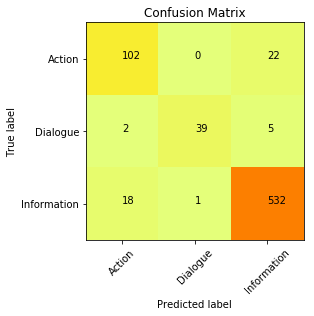

In [37]:
# And some visualization of the confusion matrix
import matplotlib.pyplot as plt

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
class_names = np.unique(y_pred)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
for i in range(3):
    for j in range(3):
        plt.text(j,i, str(cm[i][j]))
plt.show()


Interestingly they are not scoring both exactely the same.